In [1]:
from scipy.integrate import ode, solve_ivp
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect

from simulator_myokit import Simulator
sys.path.append('../')
import plot_cell

C:\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


./Protocols/trial_steps_ramps_Kernik_200_50_4_-120_60/shortened_trial_steps_ramps_Kernik_200_50_4_-120_60_500_artefact_True_short.pkl
The protocol is 9055.950603217367 ms


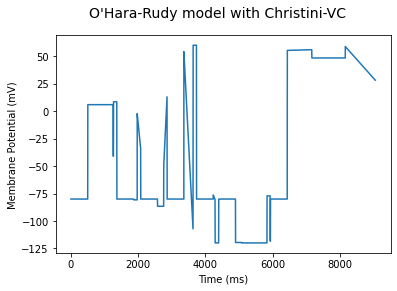

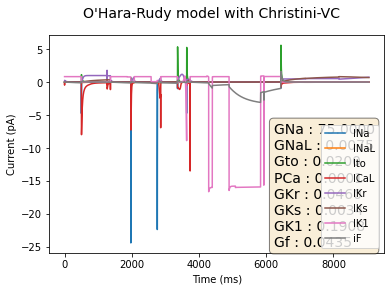

--- 20.12192130088806 seconds ---


In [4]:
sys.path.append('./Protocols')
from protocols import optimized_VC_Christini
'''
O'Hara-Rudy model with Christini-VC
'''
model_path = "./mmt-model-files/newordherg_qNet_VC.mmt" 
sim_params = {
    'cell.mode': 1,         # 'Endocardial' : 0,    'Epicardial' : 1,    'Mid-myocardial' : 2,
    'ina.GNafc' : 1,
    'inal.GNaLfc' : 1,
    'ito.Gtofc' : 1,
    'ical.PCafc' : 1,
    'ikr.GKrfc' : 1,
    'iks.GKsfc' : 1,
    'ik1.GK1fc' : 1,
    'if.Gffc' : 1    
} 
G_li = ['ina.GNa', 'inal.GNaL', 'ito.Gto', 'ical.PCa', 'ikr.GKr', 'iks.GKs', 'ik1.GK1', 'if.Gf']
I_li = ['ina.INa', 'inal.INaL', 'ito.Ito', 'ical.ICaL', 'ikr.IKr', 'iks.IKs', 'ik1.IK1', 'if.iF']   

start_time = time.time()
simulator = Simulator(model_path, optimized_VC_Christini, vhold=-80e-3) 
simulator.name = "O'Hara-Rudy model with Christini-VC"
Gs = [simulator.model.get(G).value() for G in G_li]
times = np.arange(0, simulator.protocol_total_duration, 1)# np.linspace(0, simulator.total_duration, 20000)  
simulator.pacing_constant_pre_simulate(-80e-3)
simulator.set_simulation_params(sim_params)
d = simulator.simulate(times, extra_log=I_li, pre_sim=2)        
plot_cell.plot_1D( d['engine.time'], d['membrane.V'], title=simulator.name, figsize=(6,4))
textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(Gs[0], Gs[1], Gs[2], Gs[3], Gs[4], Gs[5], Gs[6], Gs[7])
plot_cell.plot_1D_multi( d['engine.time'], [d[I] for I in I_li], labels=[I.split('.')[1] for I in I_li], title=simulator.name, figsize=(6,4), textstr=textstr)
print("--- %s seconds ---"%(time.time()-start_time))

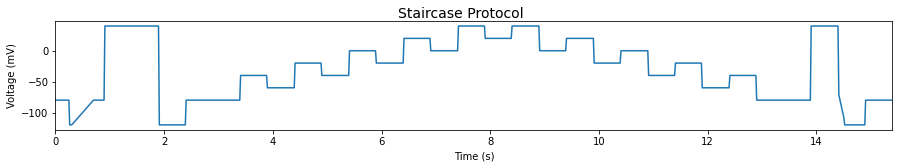

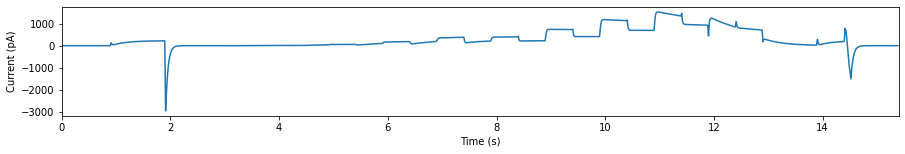

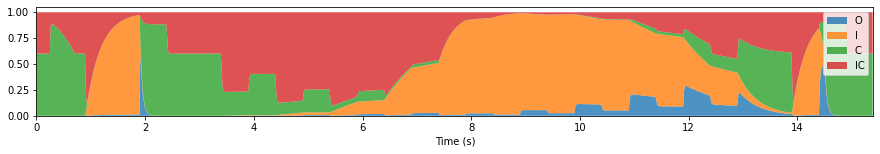

--- 10.582267999649048 seconds ---


In [3]:
sys.path.append('./Protocols')
from protocols import leak_staircase
'''
Kylie 2017 IKr
'''
model_path = "./mmt-model-files/kylie-2017-IKr.mmt" 

start_time = time.time()
simulator = Simulator(model_path, leak_staircase, vhold=-80e-3) 
simulator.name = "Kylie 2017 IKr"
times = np.linspace(0, 15.4, 1000)
# simulator.pacing_constant_pre_simulate(-80e-3)
d = simulator.simulate(times, extra_log=['ikr.IKr', 'ikr.open', 'ikr.active'], pre_sim=2)    
population_by_continent = {
    'O': d['ikr.open']*d['ikr.active'],
    'I': d['ikr.open']*(1-d['ikr.active']),
    'C': (1-d['ikr.open'])*d['ikr.active'],
    'IC': (1-d['ikr.open'])*(1-d['ikr.active']),    
}
plot_cell.plot_1D( d['engine.time'], d['membrane.V']*1000, title='Staircase Protocol', figsize=(15,2), xlabel='Time (s)', ylabel='Voltage (mV)', label=None, xlim=(0, times.max()), ylim=None, save_path=None)
plot_cell.plot_1D( d['engine.time'], d['ikr.IKr']*1000, title=None, figsize=(15,2), xlabel='Time (s)', ylabel='Current (pA)', label=None, xlim=(0, times.max()), save_path=None)
plot_cell.plot_stack( d['engine.time'], population_by_continent.values(), labels=population_by_continent.keys(), figsize=(15,2), xlabel='Time (s)', xlim=(0, times.max()), save_path=None )
print("--- %s seconds ---"%(time.time()-start_time))